<a href="https://colab.research.google.com/github/sergio-cabrales/Sentiment_Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: this program gets the sentiment of bitcoin from twitter users
# Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Upload the login file
from google.colab import files
files.upload()

Saving key.csv to key.csv


{'key.csv': b'key\r\nVRXYTatDLisGSgX0I5Bg5qM6s\r\n15Hd5VR2HqE3mUj6MEXvLMjU05OFAiVjcnSXPcF0SBZwcEq3Pp\r\n43043907-tF34e3BNP0nHXfbq9DVNGZlsJ06sWxa7poLvsbHWF\r\np6rctOiPoYz1zu8XIf96kvJxIVerwP8rv5U7ZDz4mTHkz\r\n'}

In [3]:
# Store the data
log = pd.read_csv('key.csv')

In [5]:
#Get the twitter API data
Key = log['key'][0]
Secret = log['key'][1]
Token = log['key'][2]
TokenSecret = log['key'][3]

In [6]:
#create the authentication object
authenticate = tweepy.OAuthHandler(Key,Secret)
#Set the access token and token secret
authenticate.set_access_token(Token,TokenSecret)
#Create API object
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [15]:
#Gather 2000 tweets about #Bitcoin
search_term = '#bitcoin -filter:retweets'
#Create a cursos object
tweets = tweepy.Cursor(api.search,q=search_term, lang='en', since='2021-03-01', tweet_mode= 'extended').items(2000)
#Store the tweets in a variables
all_tweets = [tweet.full_text for tweet in tweets]

In [16]:
#Create a dataframe to store tweets
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head(5)

,Tweets
0,@latokens @Trebitnetwork This is very strong p...
1,@CoinDesk @ecb @Lagarde @Tanzeel_Akhtar So the...
2,"goldman, jp morgan, morgan stanley, and others..."
3,Tesla can be bought with #Bitcoin\nHoping we'd...
4,Tesla can be bought with #Bitcoin\nHoping we'd...


In [23]:
#Create a function to Clean the tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) # Remove the # from bitcoin
  twt = re.sub('#Bitcoin', 'bitcoin', twt) # Remove the # from bitcoin
  twt = re.sub('#[A-Za-z0-9]+','', twt) # Remove the #
  twt = re.sub('@[A-Za-z0-9]+','', twt) # Remove the @
  twt = re.sub('\\n', '', twt) # Remove '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) # Remove any hiperlinks
  return twt

In [24]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show df
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@latokens @Trebitnetwork This is very strong p...,This is very strong project. Thanks for shar...,0.717778,0.587778,Positive
1,@CoinDesk @ecb @Lagarde @Tanzeel_Akhtar So the...,_Akhtar So the next bitcoin halving?,0.000000,0.000000,Neutral
2,"goldman, jp morgan, morgan stanley, and others...","goldman, jp morgan, morgan stanley, and others...",1.000000,0.250000,Positive
3,Tesla can be bought with #Bitcoin\nHoping we'd...,Tesla can be bought with bitcoinHoping we'd be...,0.712500,0.450000,Positive
4,Tesla can be bought with #Bitcoin\nHoping we'd...,Tesla can be bought with bitcoinHoping we'd be...,0.712500,0.450000,Positive


In [25]:
#Create the function to get the subjetivity
def getSubjetivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create the function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Creat two new columns called 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjetivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@latokens @Trebitnetwork This is very strong p...,This is very strong project. Thanks for shar...,0.717778,0.587778,Positive
1,@CoinDesk @ecb @Lagarde @Tanzeel_Akhtar So the...,_Akhtar So the next bitcoin halving?,0.000000,0.000000,Neutral
2,"goldman, jp morgan, morgan stanley, and others...","goldman, jp morgan, morgan stanley, and others...",1.000000,0.250000,Positive
3,Tesla can be bought with #Bitcoin\nHoping we'd...,Tesla can be bought with bitcoinHoping we'd be...,0.712500,0.450000,Positive
4,Tesla can be bought with #Bitcoin\nHoping we'd...,Tesla can be bought with bitcoinHoping we'd be...,0.712500,0.450000,Positive


In [26]:
#Create a function to get the sentimnet text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [27]:
#Create a column to store the  text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@latokens @Trebitnetwork This is very strong p...,This is very strong project. Thanks for shar...,0.717778,0.587778,Positive
1,@CoinDesk @ecb @Lagarde @Tanzeel_Akhtar So the...,_Akhtar So the next bitcoin halving?,0.000000,0.000000,Neutral
2,"goldman, jp morgan, morgan stanley, and others...","goldman, jp morgan, morgan stanley, and others...",1.000000,0.250000,Positive
3,Tesla can be bought with #Bitcoin\nHoping we'd...,Tesla can be bought with bitcoinHoping we'd be...,0.712500,0.450000,Positive
4,Tesla can be bought with #Bitcoin\nHoping we'd...,Tesla can be bought with bitcoinHoping we'd be...,0.712500,0.450000,Positive


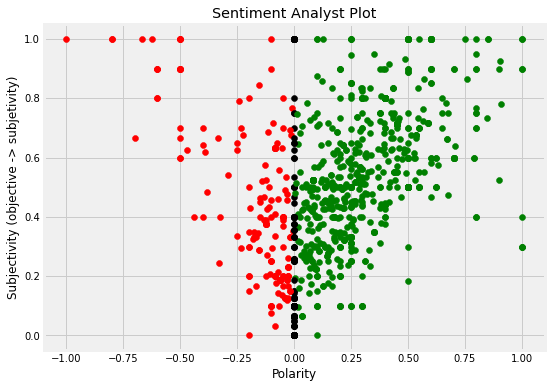

In [28]:
#Create a scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  if df['Polarity'][i] > 0:
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='green')
  elif df['Polarity'][i] == 0:
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='black')
  else:
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='red')
plt.title('Sentiment Analyst Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjetivity)')
plt.show()

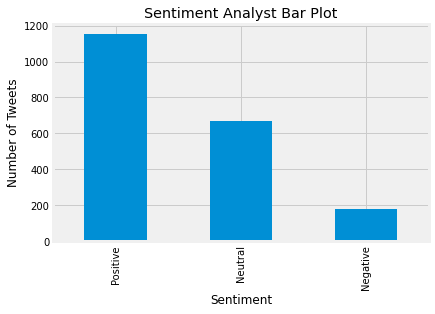

In [29]:
#Creat a bar chart 
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analyst Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [30]:
df['Sentiment'].value_counts()

Positive    1151
Neutral      670
Negative     179
Name: Sentiment, dtype: int64